# Suicide Rates Overview 1985 to 2020

In [1]:
#importing the Libery
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Data Collection

In [2]:
#loading the Data set in pandas
data = pd.read_csv('master.csv')

In [3]:
#drop the value
data = data.drop(['country-year','HDI for year'], axis=1)

In [4]:
#check first five rows of the dataset
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [5]:
#check last five rows of the dataset
data.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,"63,067,077,179",2309,Boomers


In [6]:
#check shape of the datset 
data.shape

(27820, 10)

In [7]:
#check basic infomation of the. dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [8]:
#check mathamtic realtionship of the dataset
data[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


In [9]:
#check missing value opf the dataset
data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

# EDA of the Dataset

In [10]:
#conut the value of country
data['country'].value_counts()

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64

<Axes: xlabel='year', ylabel='Density'>

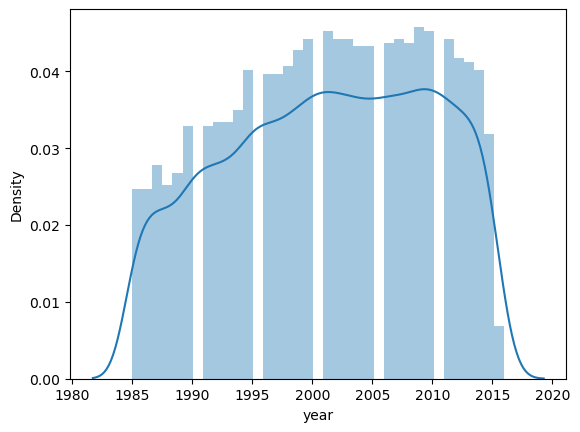

In [11]:
#plot distplot for year
sns.distplot(data['year'])

<Axes: xlabel='suicides_no', ylabel='Density'>

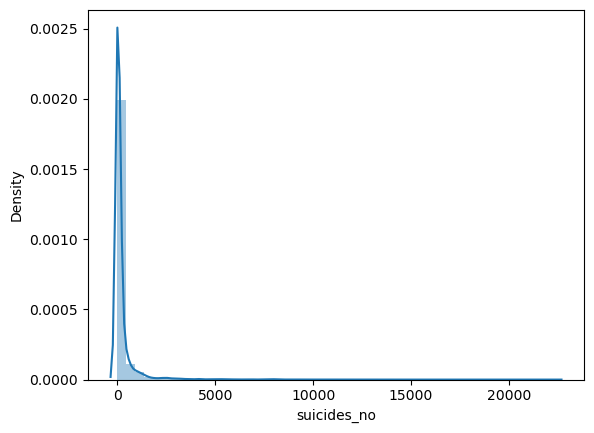

In [12]:
#plot distplot for suicides_no
sns.distplot(data['suicides_no'])

<Axes: xlabel='suicides_no', ylabel='Count'>

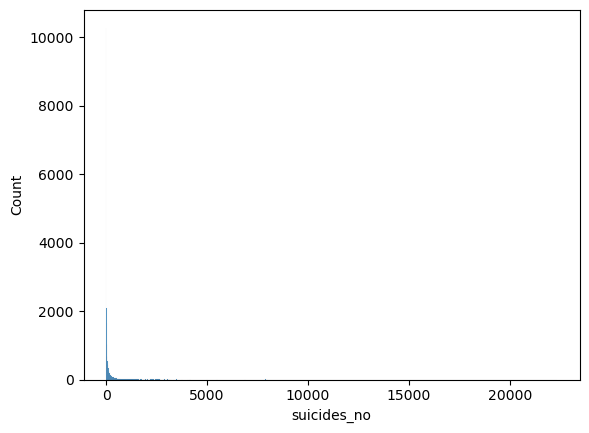

In [13]:
sns.histplot(data['suicides_no'])

<Axes: xlabel='suicides/100k pop', ylabel='Density'>

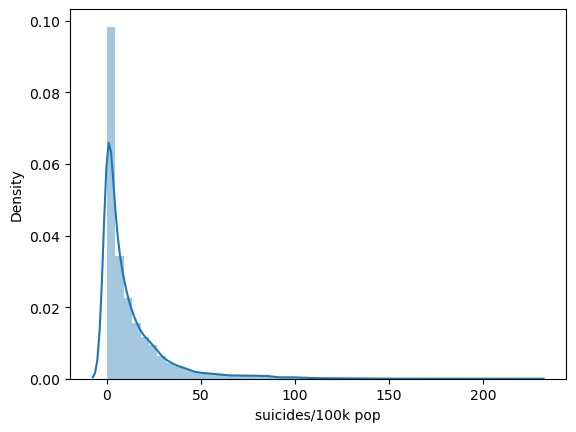

In [14]:
#plot distplot for suicides/100k pop
sns.distplot(data['suicides/100k pop'])

<Axes: xlabel='gdp_per_capita ($)', ylabel='Density'>

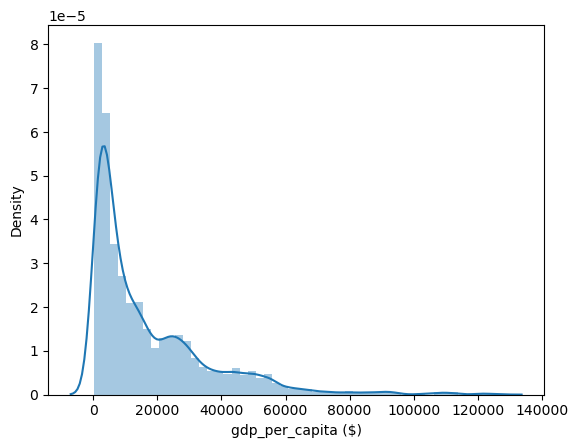

In [15]:
#plot distplot for gdp_per_capita ($)
sns.distplot(data['gdp_per_capita ($)'])

<Axes: xlabel='population', ylabel='Density'>

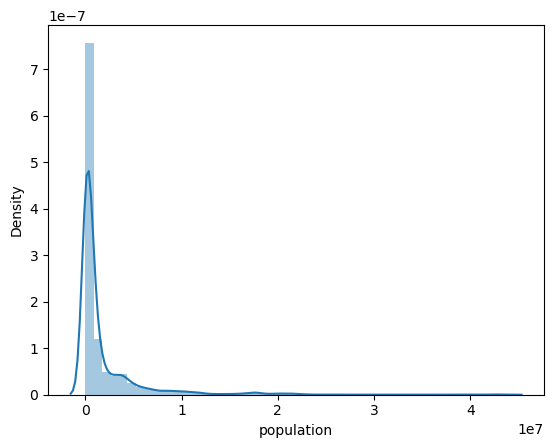

In [16]:
#plot distplot for population
sns.distplot(data['population'])

<Axes: xlabel='generation', ylabel='Count'>

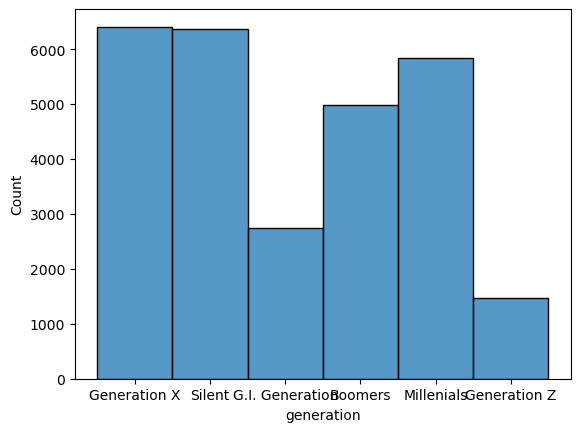

In [20]:
sns.histplot(data['generation'])

Text(0.5, 1.0, 'Suicide Rate Given Country')

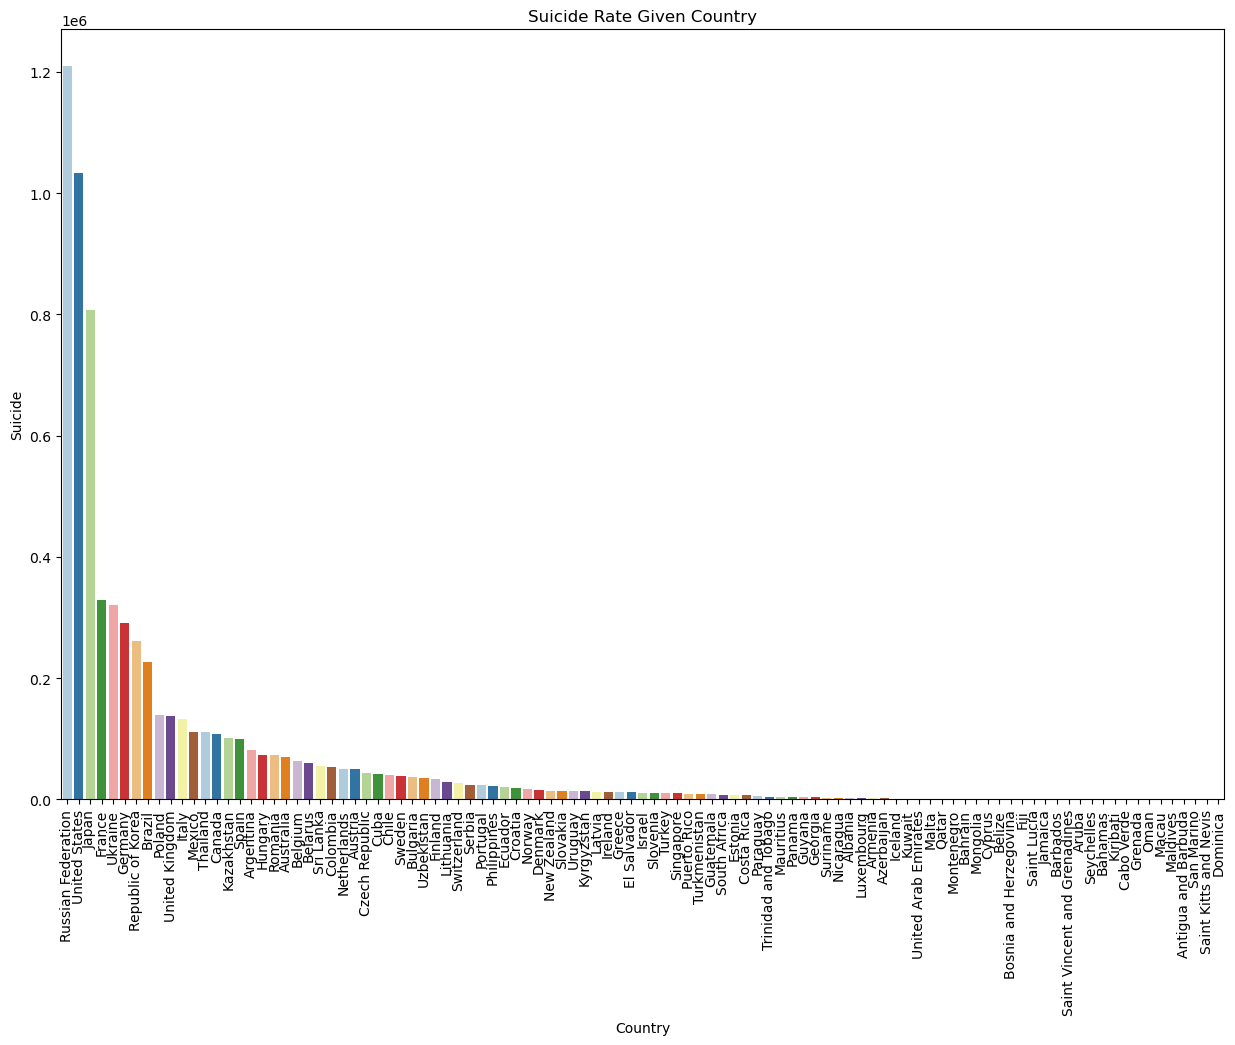

In [24]:
# Sum suicides by countrys
data_country = data.groupby(["country"]).sum()["suicides_no"].reset_index().sort_values('suicides_no',ascending=False) 

# Visualization with Bar Plot
plt.figure(figsize=(15,10))
sns.barplot(x=data_country['country'], y=data_country['suicides_no'],palette = sns.color_palette("Paired"))
plt.xticks(rotation= 90)
plt.xlabel('Country')
plt.ylabel('Suicide')
plt.title('Suicide Rate Given Country')

Text(0.5, 1.0, 'Suicide Rate Given Year')

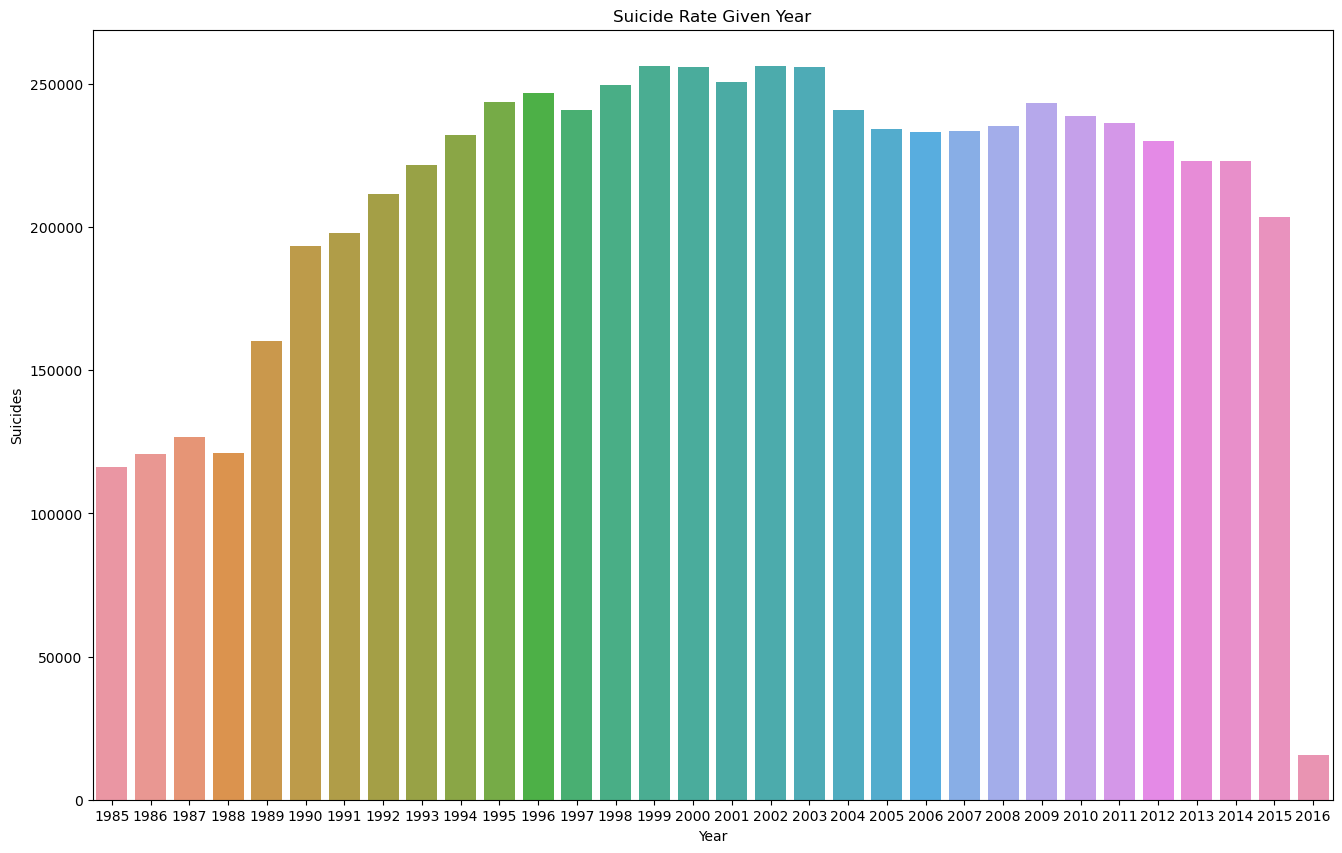

In [25]:
# Sum suicides by years
data_year = data.groupby(["year"]).sum()["suicides_no"].reset_index().sort_values("suicides_no",ascending=False)

plt.figure(figsize=(16,10))
ax= sns.barplot(x=data_year["year"], y=data_year["suicides_no"])
plt.xlabel('Year')
plt.ylabel('Suicides')
plt.title('Suicide Rate Given Year')

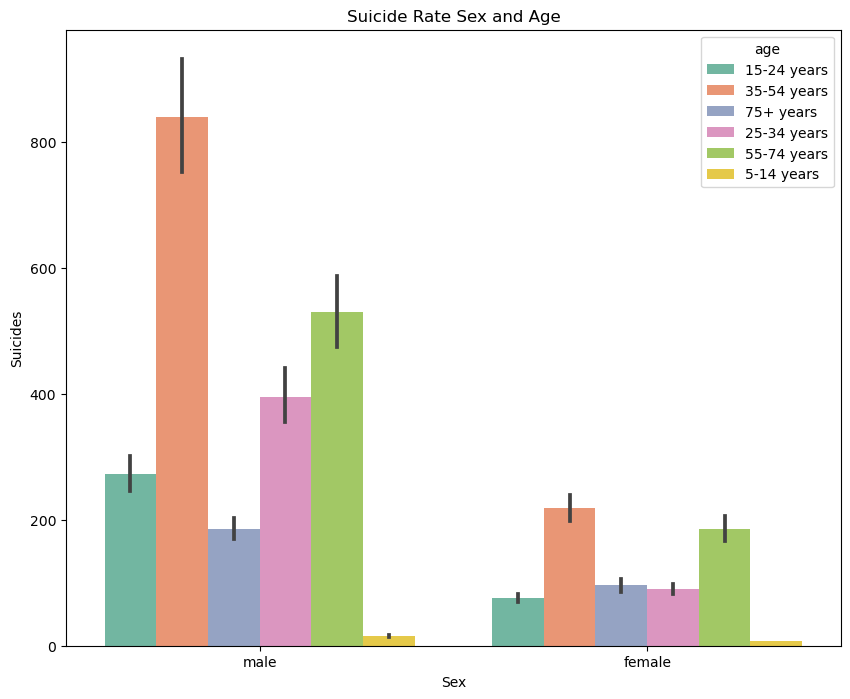

In [27]:
plt.figure(figsize=(10,8))
sns.barplot(x=data["sex"], y=data["suicides_no"],hue=data["age"], palette=sns.color_palette("Set2"))
plt.xlabel('Sex')
plt.ylabel('Suicides')
plt.title('Suicide Rate Sex and Age')
plt.show()

In [28]:
# Sum suicides by age and sex in all years
data_as = data.groupby(["age","sex"]).sum()["suicides_no"].reset_index()
data_as

,age,sex,suicides_no
0,15-24 years,female,175437
1,15-24 years,male,633105
2,25-34 years,female,208823
3,25-34 years,male,915089
4,35-54 years,female,506233
5,35-54 years,male,1945908
6,5-14 years,female,16997
7,5-14 years,male,35267
8,55-74 years,female,430036
9,55-74 years,male,1228407


In [29]:
female = data[data["sex"]=="female"]
female

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
5,Albania,1987,female,75+ years,1,35600,2.81,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,"2,156,624,900",796,Boomers
9,Albania,1987,female,5-14 years,0,311000,0.00,"2,156,624,900",796,Generation X
...,...,...,...,...,...,...,...,...,...,...
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,"63,067,077,179",2309,Millenials
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [30]:
male = data[data["sex"]=="male"]
male

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,"2,156,624,900",796,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...
27809,Uzbekistan,2014,male,25-34 years,318,2739150,11.61,"63,067,077,179",2309,Millenials
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,"63,067,077,179",2309,Boomers
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,"63,067,077,179",2309,Millenials
27813,Uzbekistan,2014,male,75+ years,17,224995,7.56,"63,067,077,179",2309,Silent


In [39]:
# Sum suicide by country and sex 
data_cs = data.groupby(["country","sex"]).sum()["suicides_no"].reset_index()
data_cs_Turkey = data_cs[data_cs['country']=='Turkey']
data_cs_Turkey

,country,sex,suicides_no
186,Turkey,female,2569
187,Turkey,male,7562


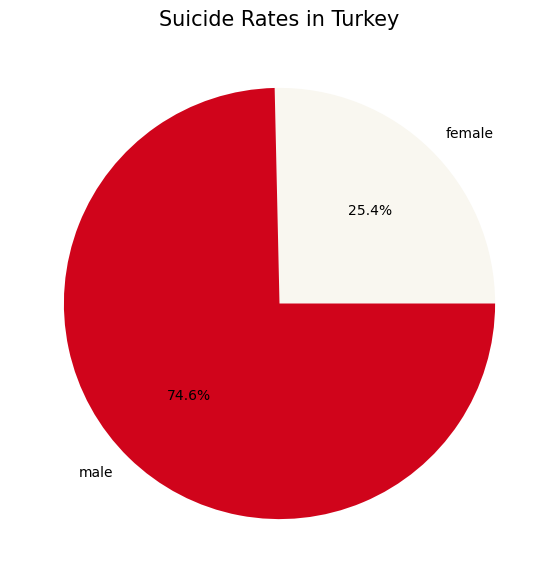

In [40]:
labels = data_cs_Turkey.sex.value_counts().index
colors = ['#f9f7f0','#d0041b']
explode = [0,0]
sizes = data_cs_Turkey.suicides_no.value_counts().index.sort_values()

# Visualization with Pie Plot
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Suicide Rates in Turkey',fontsize = 15)
plt.show()

In [41]:
data_generation = data["generation"].value_counts()
data_generation

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

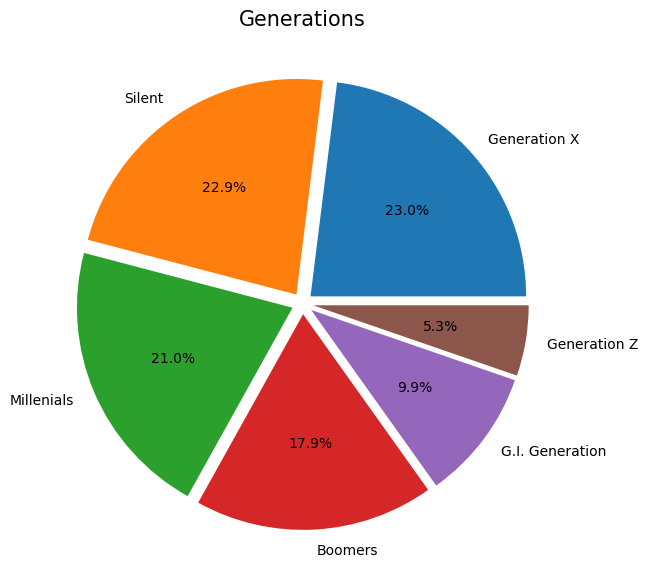

In [42]:
labels = data_generation.index
explode = [0.05,0.05,0.05,0.05,0.05,0.05]
sizes = data_generation.values

plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Generations',fontsize = 15)
plt.show()

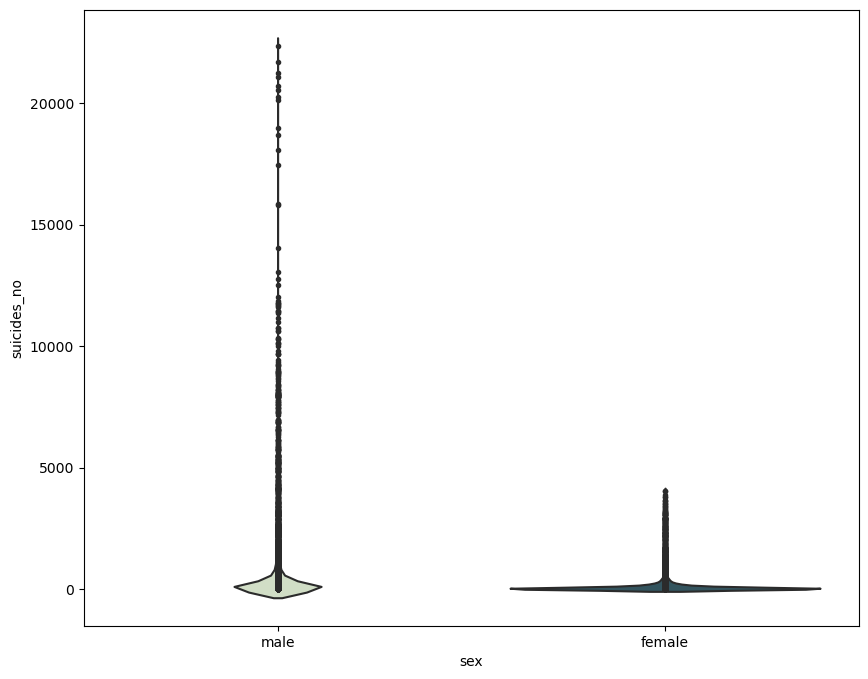

In [43]:
# Visualization with Violin Plot
plt.figure(figsize=(10,8))
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(x="sex", y="suicides_no",data=data, palette=pal, inner="points")
plt.show()

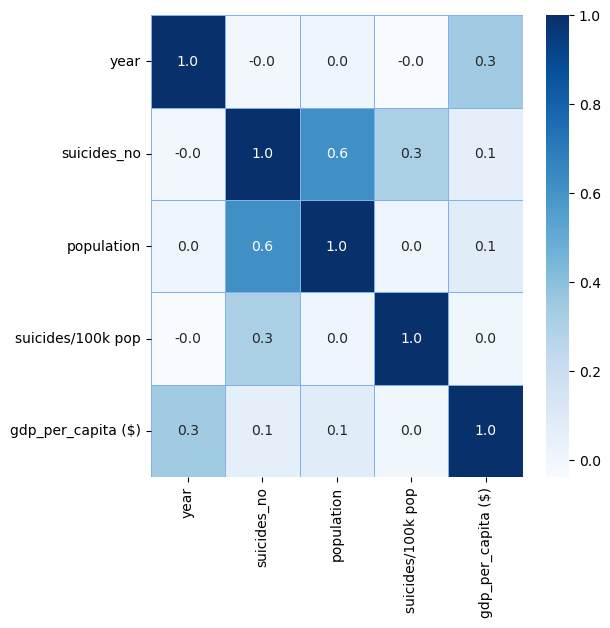

In [44]:
# Heatmap
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data.corr(), cmap="Blues",annot=True, linewidths=0.5,linecolor="#7fb0f0", fmt= '.1f',ax=ax)
plt.show()

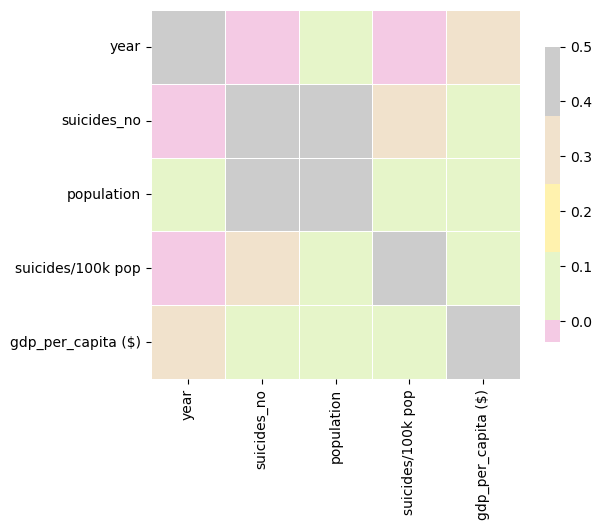

In [45]:
sns.heatmap(data.corr(), cmap="Pastel2", vmax=0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.show()

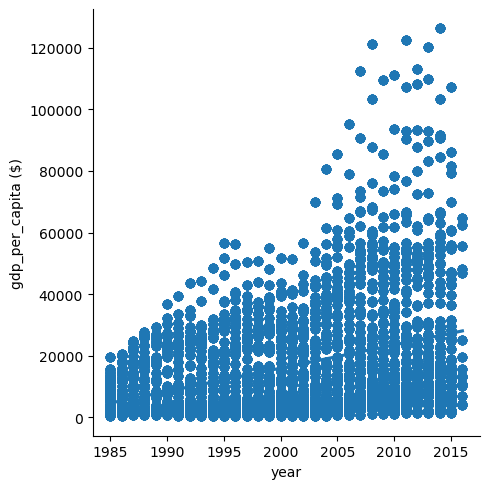

In [47]:
# Visualization with Lm Plot
sns.lmplot(x="year", y="gdp_per_capita ($)", data=data)
plt.show()

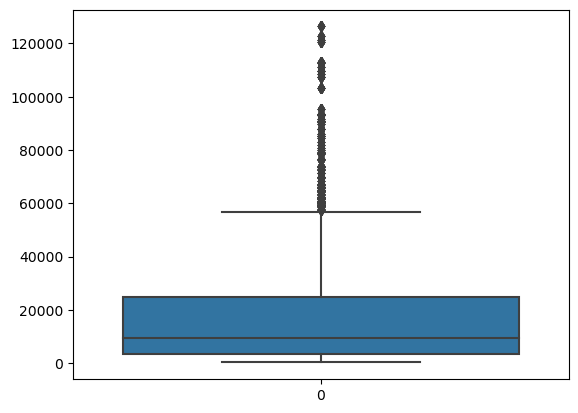

In [48]:
# Visualization with Box Plot
sns.boxplot(data['gdp_per_capita ($)'])
plt.show()

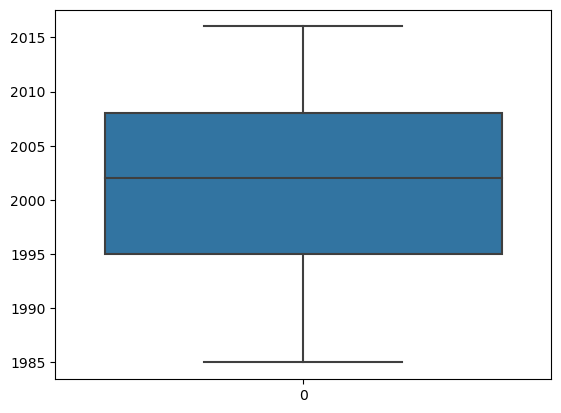

In [49]:
sns.boxplot(data['year'])
plt.show()

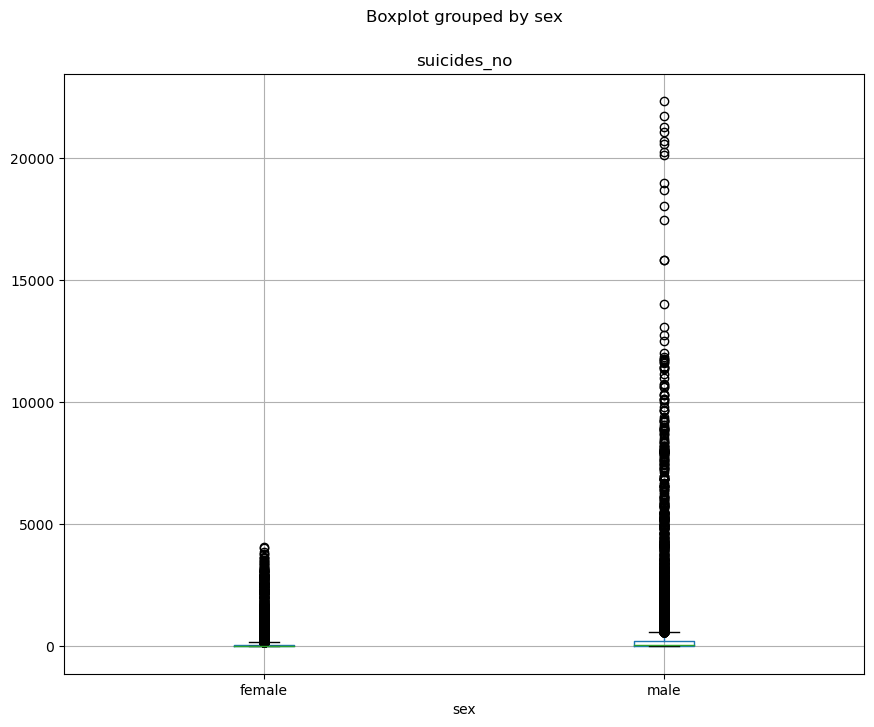

In [50]:
data.boxplot(figsize=(10,8),column='suicides_no',by ='sex')
plt.show()

In [51]:
# Sum suicide by country, sex and age 
data_csa = data.groupby(["country","sex","age"]).sum()["suicides_no"].reset_index().sort_values("suicides_no")
data_csa = data_csa[:605]

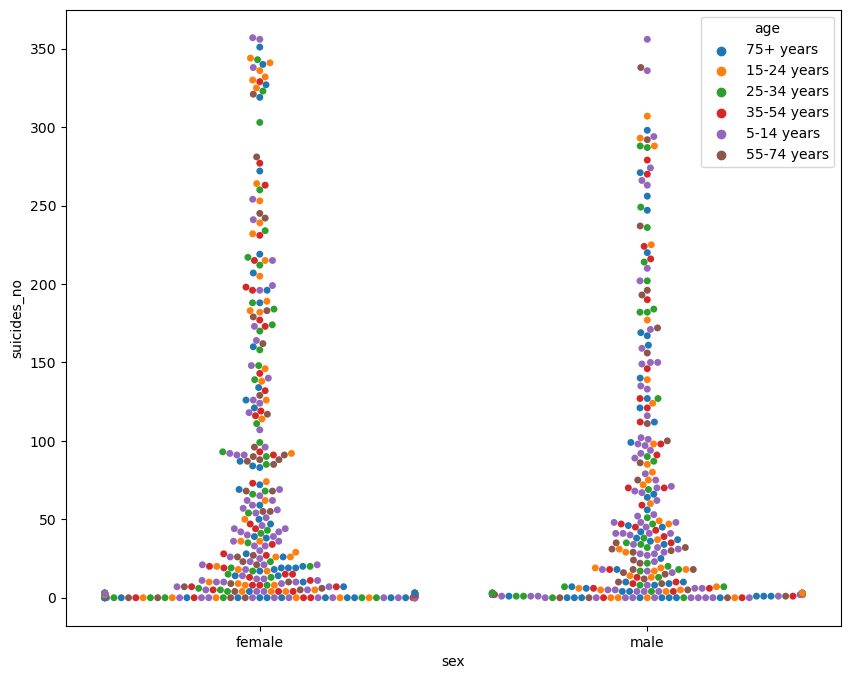

In [52]:
# Visualization with Swarm Plot
plt.figure(figsize=(10,8))
sns.swarmplot(x="sex", y="suicides_no",hue="age", data=data_csa)
plt.show()

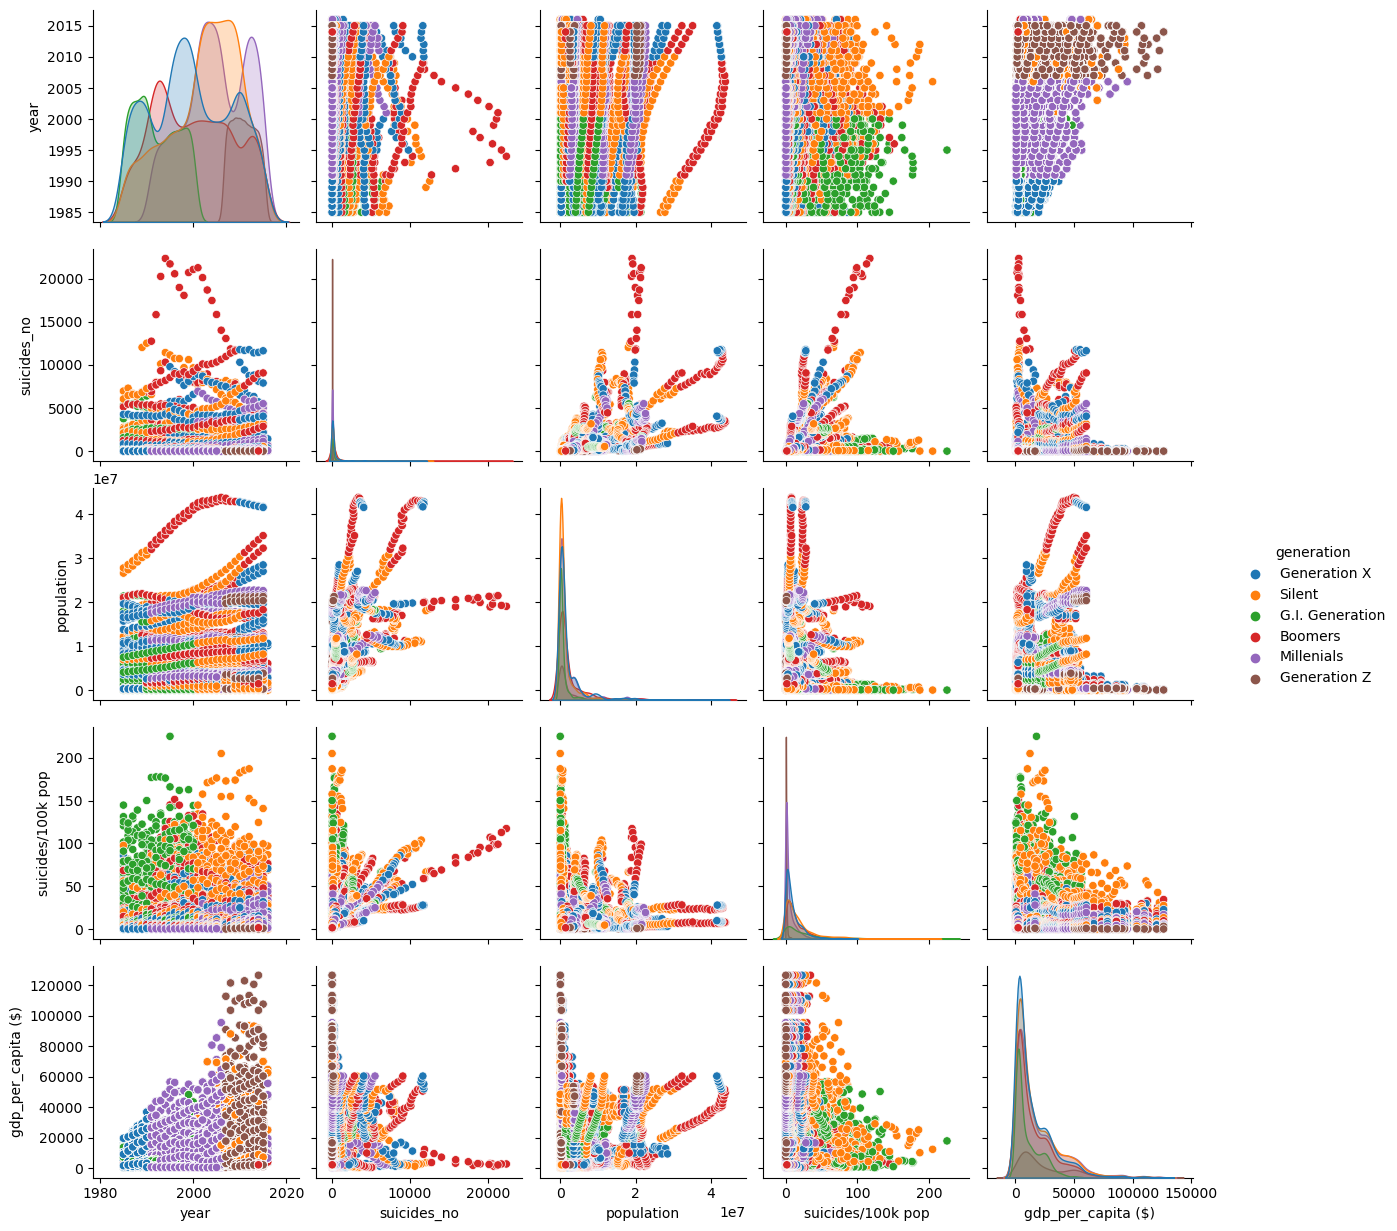

In [53]:
sns.pairplot(data, hue="generation")
plt.show()

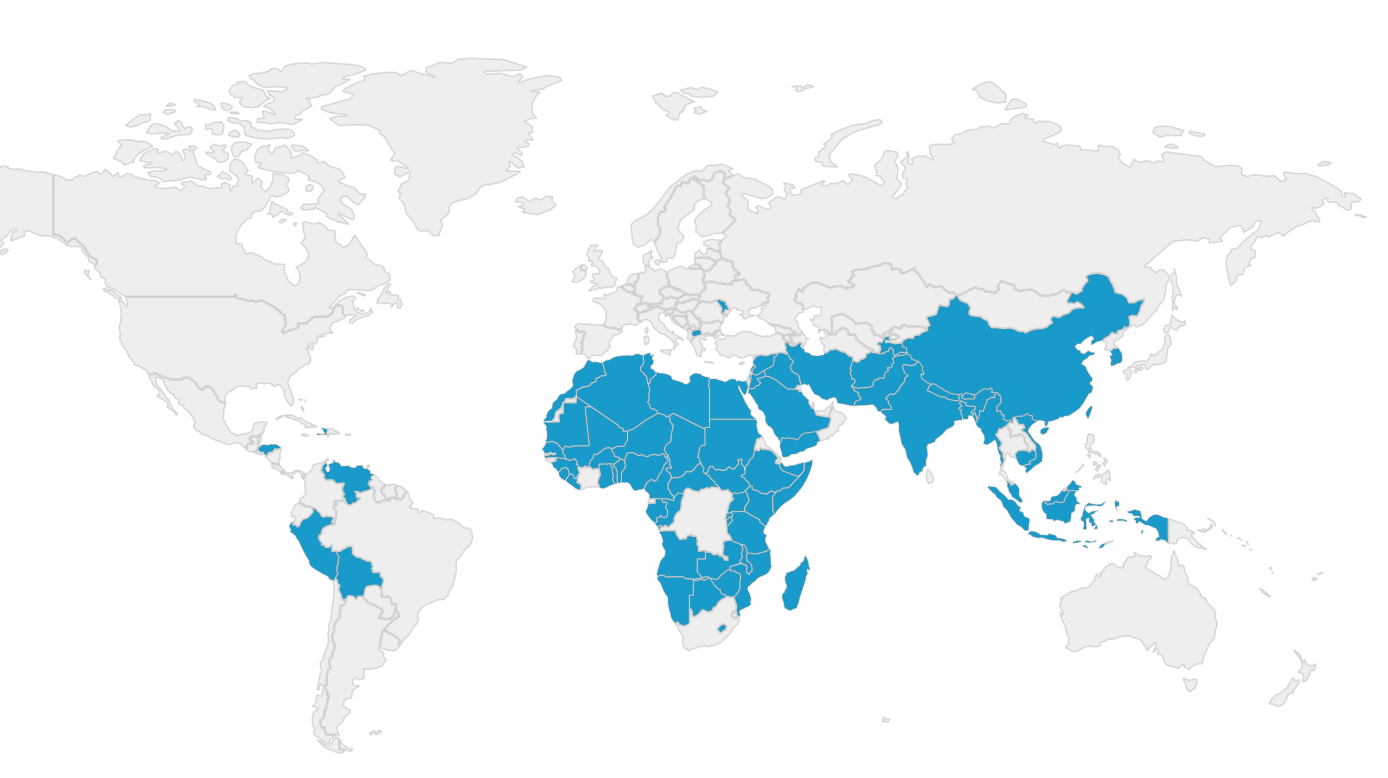

In [5]:
from IPython.display import Image
Image('missed countries.png')

Count of suicides for 31 years. Note that not all countries are included in this list! This is extremely important.

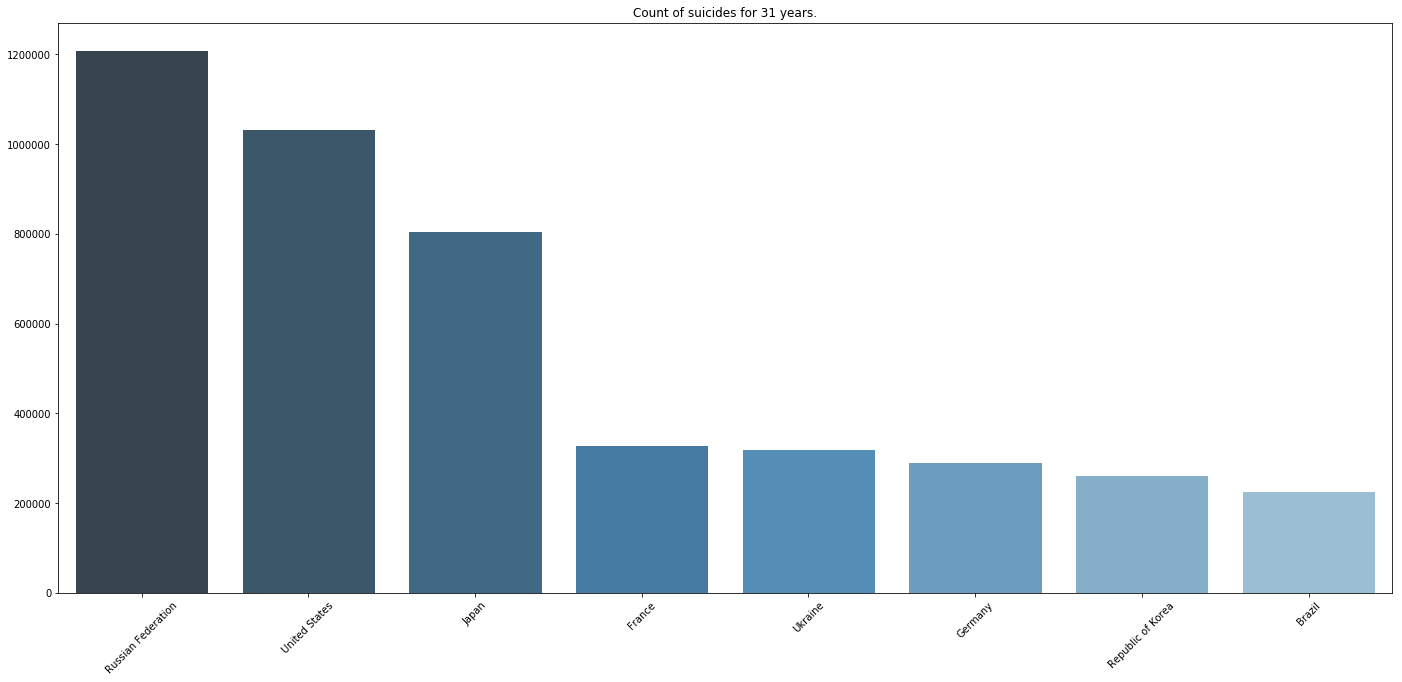

In [6]:
suic_sum = pd.DataFrame(data['suicides_no'].groupby(data['country']).sum())
suic_sum = suic_sum.reset_index().sort_index(by='suicides_no', ascending=False)
most_cont = suic_sum.head(8)
fig = plt.figure(figsize=(20, 10))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale=2)
sns.barplot(y='suicides_no', x='country', data=most_cont, palette="Blues_d")
plt.xticks(rotation=45)
plt.ylabel('');
plt.xlabel('')
plt.tight_layout()

In [7]:
from mpl_toolkits.basemap import Basemap
concap = pd.read_csv('../input/world-capitals-gps/concap.csv')
concap.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [8]:
def reg(x):
    if x == 'Russia':
        res = 'Russian Federation'
    else:
        res = x
    return res
concap['CountryName'] = concap['CountryName'].apply(reg)

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         suic_sum,left_on='CountryName',right_on='country')

Consider it on the map. I will remind you, that many big (by population) countries aren't included in this dataset.

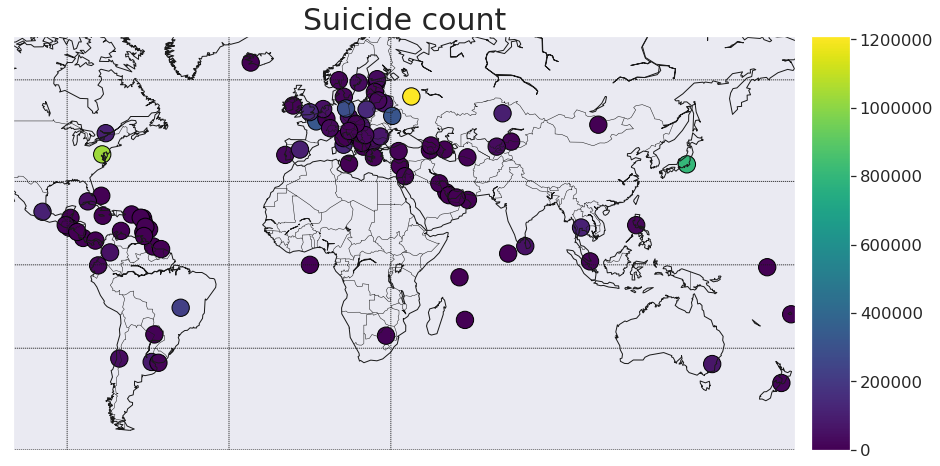

In [9]:
def mapWorld(col1, size2, title3, label4, metr=100, colmap='hot'):
    m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=70,
            llcrnrlon=-110, urcrnrlon=180, resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90, 91., 30.))
    m.drawmeridians(np.arange(-90, 90., 60.))
    lat = data_full['CapitalLatitude'].values
    lon = data_full['CapitalLongitude'].values
    a_1 = data_full[col1].values
    if size2:
        a_2 = data_full[size2].values
    else: a_2 = 1
    m.scatter(lon, lat, latlon=True, c=a_1, s=metr*a_2, linewidth=1, edgecolors='black', cmap=colmap, alpha=1)
    
    cbar = m.colorbar()
    cbar.set_label(label4,fontsize=30)
    plt.title(title3, fontsize=30)
    plt.show()
sns.set(font_scale=1.5)
plt.figure(figsize=(15,15))
mapWorld(col1='suicides_no', size2=False, title3='Suicide count', label4='', metr=300, colmap='viridis')

Compare it with map - gdp_per_capita ($)

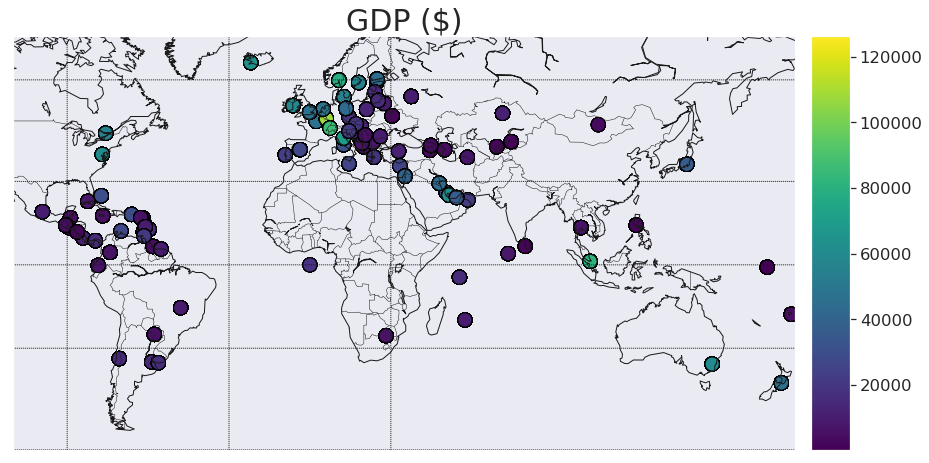

In [10]:
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         data,left_on='CountryName',right_on='country')
plt.figure(figsize=(15,15))
mapWorld(col1='gdp_per_capita ($)', size2=False,title3='GDP ($)',label4='',metr=200,colmap='viridis')

Consider same barplot with with gender difference:

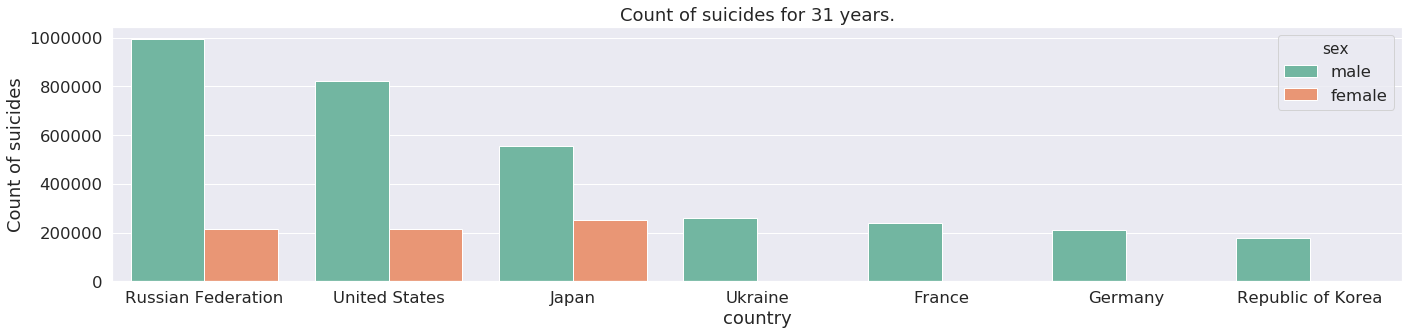

In [11]:
suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()
suic_sum_m = suic_sum_m.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont_m = suic_sum_m.head(10)
most_cont_m.head(10)
fig = plt.figure(figsize=(20,5))
plt.title('Count of suicides for 31 years.')
sns.set(font_scale=1.5)
sns.barplot(y='suicides_no',x='country',hue='sex',data=most_cont_m,palette='Set2');
plt.ylabel('Count of suicides')
plt.tight_layout()

Compare this with statistics - suicides/100k pop.

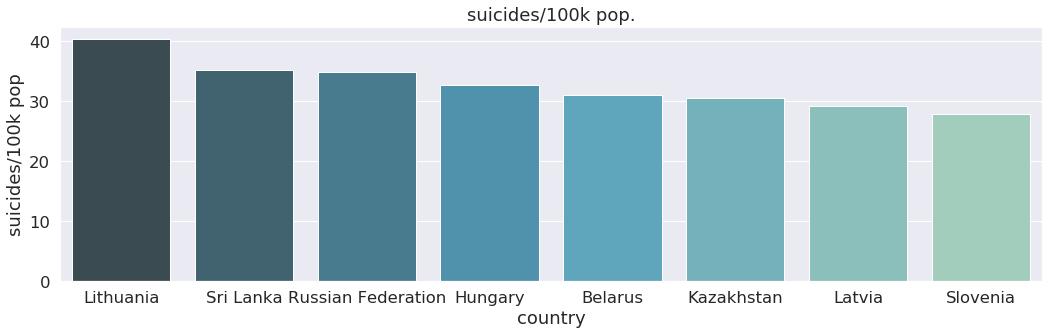

In [12]:
suic_mean = pd.DataFrame(data['suicides/100k pop'].groupby(data['country']).mean())
suic_mean = suic_mean.reset_index()
suic_mean_most = suic_mean.sort_index(by='suicides/100k pop',ascending=False).head(8)

fig = plt.figure(figsize=(15,5))
plt.title('suicides/100k pop.')
#sns.set(font_scale=1.5)
sns.barplot(y='suicides/100k pop',x='country',data=suic_mean_most,palette="GnBu_d");
plt.ylabel('suicides/100k pop')
plt.tight_layout()

Let's divide data into old and new:

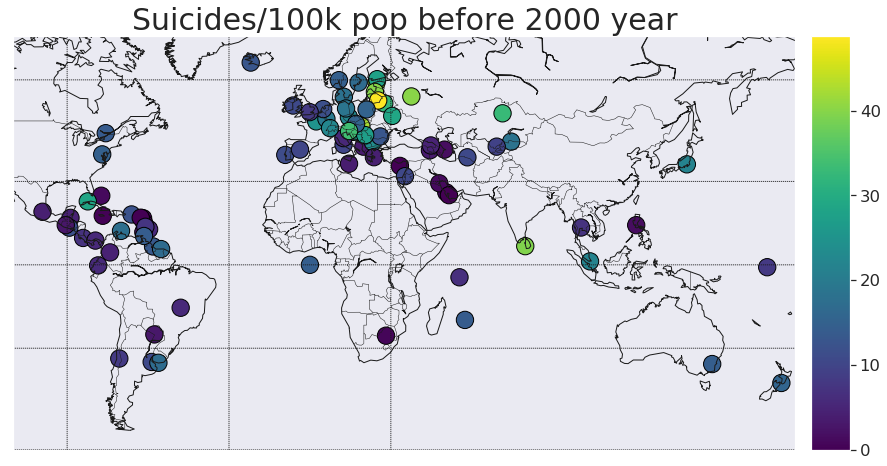

In [13]:
data_past = data[data['year']<2000]
suic_mean = pd.DataFrame(data_past['suicides/100k pop'].groupby(data_past['country']).mean())
suic_mean = suic_mean.reset_index()
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         suic_mean,left_on='CountryName',right_on='country')
plt.figure(figsize=(15,15))
mapWorld(col1='suicides/100k pop', size2=False,title3='Suicides/100k pop before 2000 year',label4='',metr=300,colmap='viridis')

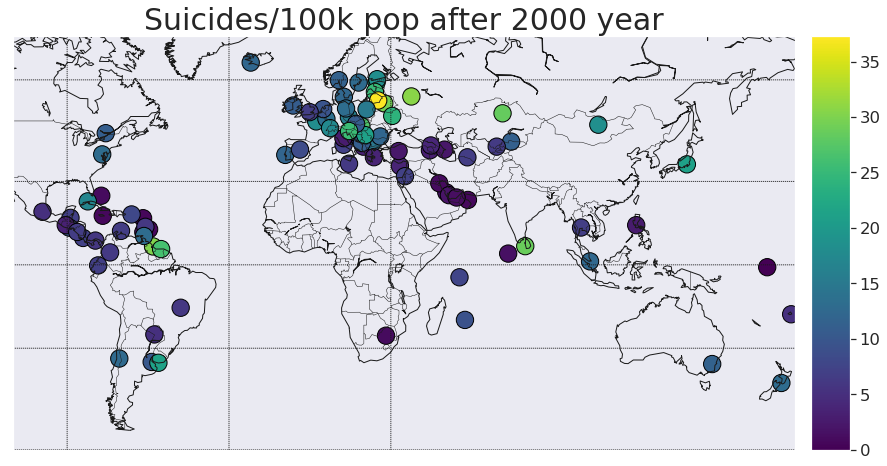

In [14]:
data_last = data[data['year'] > 2000]
suic_mean = pd.DataFrame(data_last['suicides/100k pop'].groupby(data_last['country']).mean())
suic_mean = suic_mean.reset_index()
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         suic_mean,left_on='CountryName',right_on='country')
plt.figure(figsize=(15,15))
mapWorld(col1='suicides/100k pop', size2=False,title3='Suicides/100k pop after 2000 year',label4='',metr=300,colmap='viridis')

Here we can see count of suicides by year distribution:

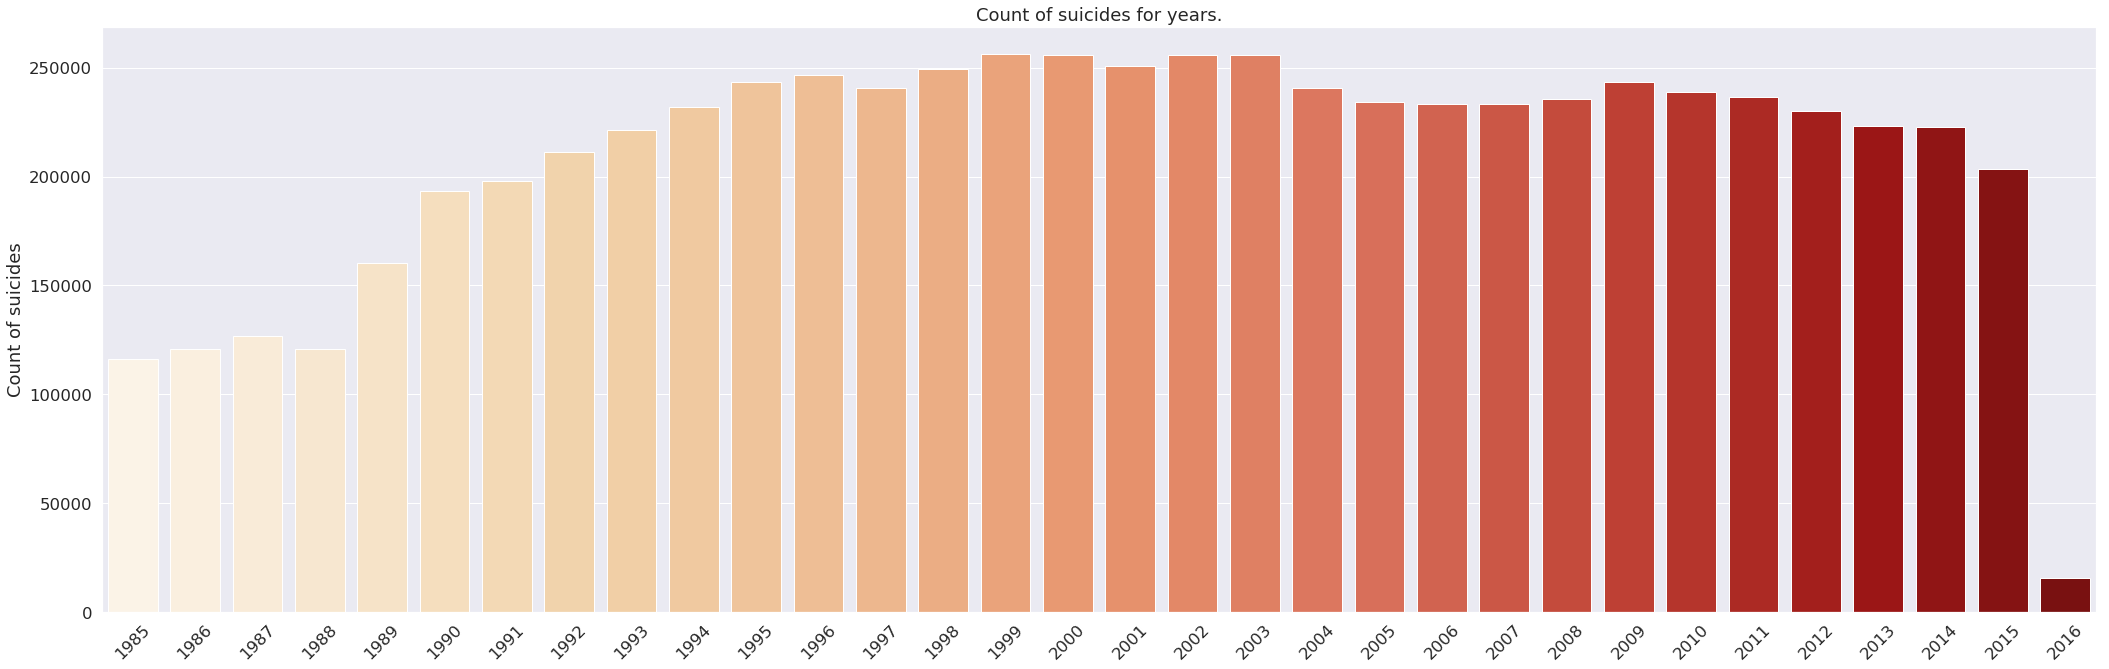

In [15]:
suic_sum_yr = pd.DataFrame(data['suicides_no'].groupby(data['year']).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont_yr = suic_sum_yr
fig = plt.figure(figsize=(30,10))
plt.title('Count of suicides for years.')
sns.set(font_scale=2.5)
sns.barplot(y='suicides_no',x='year',data=most_cont_yr,palette="OrRd");
plt.ylabel('Count of suicides')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()

What is the most critical age group?

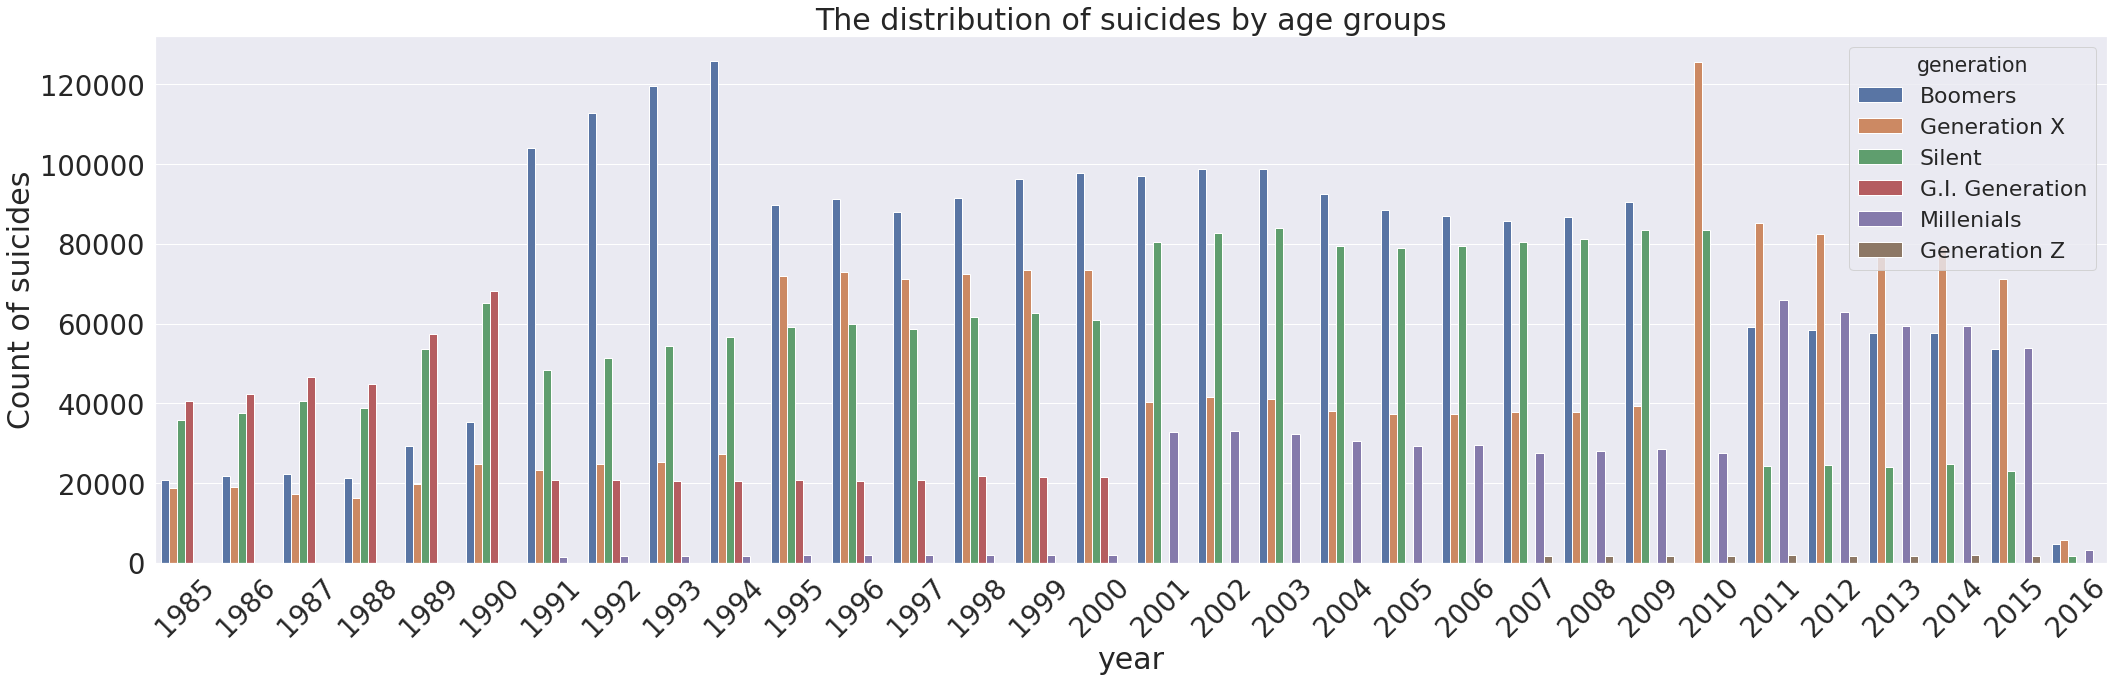

In [16]:
suic_sum_yr = pd.DataFrame(data['suicides_no'].groupby([data['generation'],data['year']]).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont_yr = suic_sum_yr
fig = plt.figure(figsize=(30,10))
plt.title('The distribution of suicides by age groups')

sns.set(font_scale=2)
sns.barplot(y='suicides_no',x='year',hue='generation',data=most_cont_yr,palette='deep');
plt.ylabel('Count of suicides')
plt.xticks(rotation=45)
plt.tight_layout()

In [17]:
suic_sum_yr = pd.DataFrame(data['suicides_no'].groupby([data['generation'],data['country']]).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont = suic_sum_yr

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         most_cont,left_on='CountryName',right_on='country')

For this map, color - generation, size - suicides_no

 Generation X:100 
 Silent:200 
 G.I. Generation:300 
 Boomers:400 
 Millenials:500 
 Generation Z:600


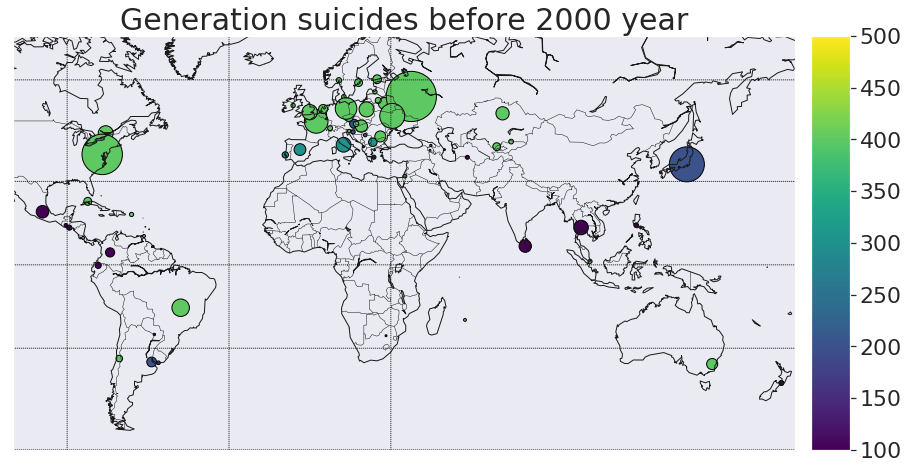

In [18]:
data_new = data[data['year']<2000]
title_map = 'Generation suicides before 2000 year'
data_gener = pd.DataFrame(data_new['suicides_no'].groupby([data_new['generation'],data_new['country']]).sum()).reset_index()
age_max = pd.DataFrame(data_gener['suicides_no'].groupby(data_gener['country']).max()).reset_index()
gen_full = pd.merge(age_max,data_gener,left_on=['suicides_no','country'],right_on=['suicides_no','country'])

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         gen_full,left_on='CountryName',right_on='country')
data_full.dropna(inplace=True)

def gener(x):
    dic_t = {'Generation X':100,'Silent':200,'G.I. Generation':300,'Boomers':400,'Millenials':500,'Generation Z':600}
    return dic_t[x]
data_full.generation = data_full.generation.apply(gener)
print(" Generation X:100 \n Silent:200 \n G.I. Generation:300 \n Boomers:400 \n Millenials:500 \n Generation Z:600")
plt.figure(figsize=(15,15))
mapWorld(col1='generation', size2='suicides_no', title3=title_map,label4='',metr=0.01,colmap='viridis')

 Generation X:100 
 Silent:200 
 G.I. Generation:300 
 Boomers:400 
 Millenials:500 
 Generation Z:600


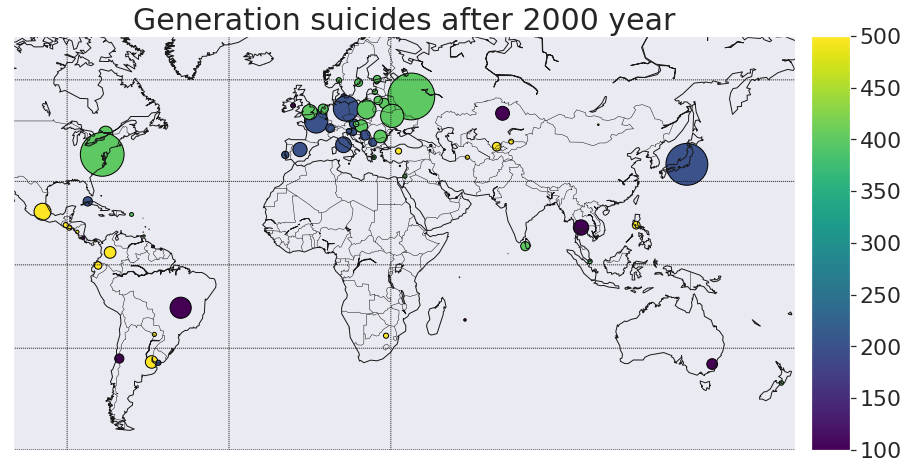

In [19]:
data_new = data[data['year']>=2000]
title_map = 'Generation suicides after 2000 year'
data_gener = pd.DataFrame(data_new['suicides_no'].groupby([data_new['generation'],data_new['country']]).sum()).reset_index()
age_max = pd.DataFrame(data_gener['suicides_no'].groupby(data_gener['country']).max()).reset_index()
gen_full = pd.merge(age_max,data_gener,left_on=['suicides_no','country'],right_on=['suicides_no','country'])

data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         gen_full,left_on='CountryName',right_on='country')
data_full.dropna(inplace=True)

def gener(x):
    dic_t = {'Generation X':100,'Silent':200,'G.I. Generation':300,'Boomers':400,'Millenials':500,'Generation Z':600}
    return dic_t[x]
data_full.generation = data_full.generation.apply(gener)
print(" Generation X:100 \n Silent:200 \n G.I. Generation:300 \n Boomers:400 \n Millenials:500 \n Generation Z:600")
plt.figure(figsize=(15,15))
mapWorld(col1='generation', size2='suicides_no', title3=title_map,label4='',metr=0.01,colmap='viridis')

# THANK YOU